# 建立数据集

In [2]:
import torch
import torch.nn.functional as F     # 激励函数都在这
import matplotlib.pyplot as plt

# 建造数据, 搭建网络

In [3]:
torch.manual_seed(1)    # reproducible

# 伪数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.03)
    loss_func = torch.nn.MSELoss()

    # 训练
    for t in range(700):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # plot result
    plt.figure(1, figsize=(5, 5))
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    torch.save(net1, 'net.pkl')  # 保存整个网络
    torch.save(net1.state_dict(), 'net_params.pkl')   # 只保存网络中的参数 (速度快, 占内存少)

# 两种途径来保存

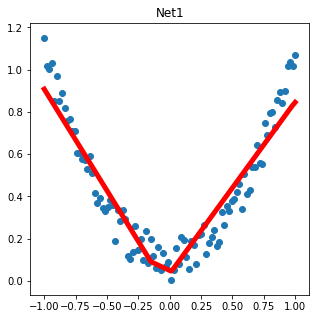

In [3]:
# 保存 net1 (1. 整个网络, 2. 只有参数)
save()

# 提取整个网络

In [4]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
    # plot result
    plt.figure(1, figsize=(5, 5))
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

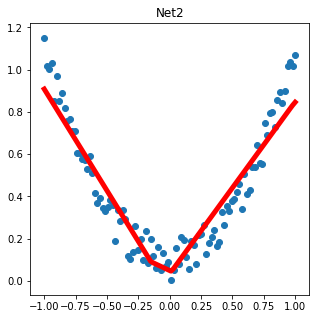

In [5]:
# 提取整个网络
restore_net()

# 只提取网络参数

In [6]:
def restore_params():
    # 新建 net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # 将保存的参数复制到 net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    # plot result
    plt.figure(1, figsize=(5, 5))
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

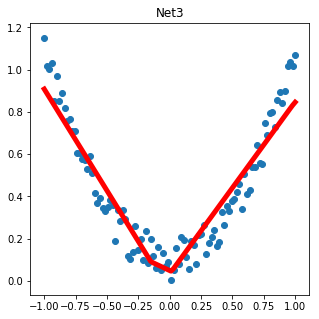

In [7]:
# 提取网络参数, 复制到新网络
restore_params()